# Movie Review Sentiment Analysis


## Victoria Hall
## 1/16/2022

In [2]:
#Importing Packages
import pandas as pd
import numpy as np
from textblob import Word
from textblob import TextBlob
from sklearn.metrics import confusion_matrix

## Step 1 

In [3]:
#Reading File
movie_df = pd.read_csv('labeledTrainData.tsv',sep = '\t')
movie_df.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
#Converting text to lowercase
movie_df["review"] = movie_df["review"].str.lower()
movie_df.head(5)

import unicodedata
import sys


In [5]:
#Removing white space
movie_df["review_strip"] = [string.strip() for string in movie_df["review"]]

#Removing punctuation
#Creating a dictionary of punc.
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                           if unicodedata.category(chr(i)).startswith("P"))

movie_df["review_nopunc"] = [string.translate(punctuation) for string in movie_df["review_strip"]]
movie_df.head(5)

,id,sentiment,review,review_strip,review_nopunc
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi...","\the classic war of the worlds\"" by timothy hi...",the classic war of the worlds by timothy hines...
2,7759_3,0,the film starts with a manager (nicholas bell)...,the film starts with a manager (nicholas bell)...,the film starts with a manager nicholas bell g...
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


In [6]:
#Tokenizing. Using apply to tokenize
from nltk.tokenize import word_tokenize
movie_df["tokens"] = movie_df["review_nopunc"].apply(word_tokenize)
movie_df.head(5)

#Removing Stop Words
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = stopwords.words("english")
movie_df["tokens_nostop"] = movie_df["tokens"].apply(lambda x: [word for word in x if word not in stop_words])
movie_df.head(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hallt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,sentiment,review,review_strip,review_nopunc,tokens,tokens_nostop
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[stuff, going, moment, mj, ive, started, liste..."
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi...","\the classic war of the worlds\"" by timothy hi...",the classic war of the worlds by timothy hines...,"[the, classic, war, of, the, worlds, by, timot...","[classic, war, worlds, timothy, hines, enterta..."
2,7759_3,0,the film starts with a manager (nicholas bell)...,the film starts with a manager (nicholas bell)...,the film starts with a manager nicholas bell g...,"[the, film, starts, with, a, manager, nicholas...","[film, starts, manager, nicholas, bell, giving..."
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,it must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, wondrously, unpretentious, ..."


In [7]:
#Stemming
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
movie_df["Stems"] = movie_df["tokens_nostop"].apply(lambda x: [porter.stem(word) for word in x])
#Untokenize
movie_df['final']= movie_df['Stems'].apply(lambda word: ' '.join(word))
movie_df.head(5)

,id,sentiment,review,review_strip,review_nopunc,tokens,tokens_nostop,Stems,final
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,...","[stuff, going, moment, mj, ive, started, liste...","[stuff, go, moment, mj, ive, start, listen, mu...",stuff go moment mj ive start listen music watc...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi...","\the classic war of the worlds\"" by timothy hi...",the classic war of the worlds by timothy hines...,"[the, classic, war, of, the, worlds, by, timot...","[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,7759_3,0,the film starts with a manager (nicholas bell)...,the film starts with a manager (nicholas bell)...,the film starts with a manager nicholas bell g...,"[the, film, starts, with, a, manager, nicholas...","[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,it must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai...","[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, 80, ex...",superbl trashi wondrous unpretenti 80 exploit ...


## Step 2

In [8]:
#Importing training and test
from sklearn.model_selection import train_test_split

In [9]:
#Creating training and test. Using sentiment as y
x = movie_df.drop('sentiment',1)
y = movie_df['sentiment']

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.2)


## Step 3

In [10]:
#Fit and apply the tf-idf vectorization to the training set

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer()
tfidf_matrix_train = tfidf.fit_transform(x_train['final'])
tfidf_matrix_train.shape

(20000, 72509)

## Step 4 

In [11]:
#Apply but DO NOT FIT the tf-idf vectorization to the test set 
# Only applying the transformation rather than fitting to prevent leakage of test data into the model



tfidf_matrix_test= tfidf.transform(x_test['final'])
tfidf_matrix_test.shape


(5000, 72509)

## Step 5

In [12]:
#Train a logistic regression using the training data.

#Loading necessary libraries
from sklearn.linear_model import LogisticRegression

#Creating a logistic regression object
logistic_regression = LogisticRegression(random_state=0)

#training the model
logmodel = logistic_regression.fit(tfidf_matrix_train,y_train)


## Step 6-9

In [13]:
#Find the model accuracy on test set.
#Create a confusion matrix for the test set predictions.
#Get the precision, recall, and F1-score for the test set predictions.
#Create a ROC curve for the test set.

#Loading libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics

The Accuracy score of the logistic regression model is: 0.8852


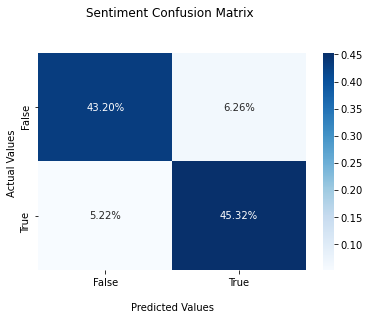

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2473
           1       0.88      0.90      0.89      2527

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



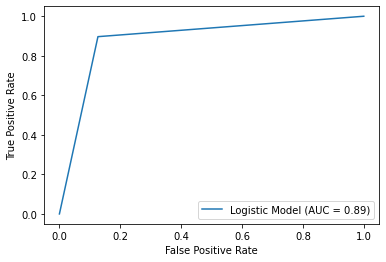

In [14]:
#Finding accuracy
#Using model to predict on test
y_pred = logmodel.predict(tfidf_matrix_test)


print("The Accuracy score of the logistic regression model is:", accuracy_score(y_test,y_pred))


#Creating confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
#Using seaborn to better visualize the matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('Sentiment Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


#Classification (Presicion, recall, f1)
print(classification_report(y_test,y_pred))

#ROC Curve
#Finding false/truepos rates
fpr,tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic Model')
display.plot()
plt.show()

## Step 10

### Building a Support Vector Machine Model 

The Accuracy score of the SVM model is: 0.8886


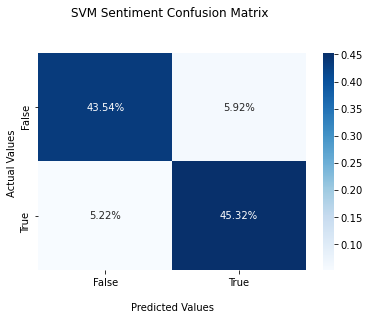

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2473
           1       0.88      0.90      0.89      2527

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



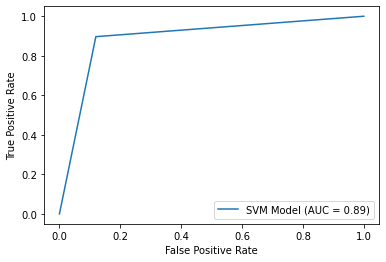

In [15]:
#imporing model from sklearn

from sklearn import svm

#creating the classifier
#Choosing a linear kernel for simplicity but more testing would be needed to determine if this is the best manner
clf = svm.SVC(kernel = 'linear')

#Training the model
clf.fit(tfidf_matrix_train,y_train)


#Finding accuracy
#Using model to predict on test
y_pred_clf = clf.predict(tfidf_matrix_test)


print("The Accuracy score of the SVM model is:", accuracy_score(y_test,y_pred_clf))


#Creating confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred_clf)
#Using seaborn to better visualize the matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
ax.set_title('SVM Sentiment Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


#Classification (Presicion, recall, f1)
print(classification_report(y_test,y_pred_clf))

#ROC Curve
#Finding false/truepos rates
fpr,tpr, thresholds = roc_curve(y_test,y_pred_clf)
roc_auc=metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='SVM Model')
display.plot()
plt.show()

My SVM did seem to perform only slight better than the logistic regression model. In this instance, I would choose logistic regression because it seems to perform similarly well and computationally runs quicker. 